## Testing notebook

In [1]:
import algorithm as a1
import zdt3
import numpy as np
import matplotlib.pyplot as plt
import parsing as p

In [38]:
moec = a1.MOEC(40,100,30,0.5,0.5,20)

In [39]:
frente = moec.run()

In [6]:
zdt = zdt3.ZDT3()

In [10]:
zdt.func(frente[0])

(0.854996148105287, -0.30583281900397885)

In [40]:
res_1 = np.array([zdt.func(c)[0] for c in frente])
res_2 = np.array([zdt.func(c)[1] for c in frente])

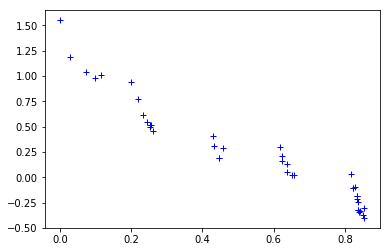

In [12]:
plt.plot(res_1,res_2,'b+')
plt.show()

In [19]:
pareto_nsga = open("NSGAII_outs/plot.out")

In [20]:
p_s=pareto_nsga.read()

In [24]:
p_l=p_s.split("\n")

40

In [41]:
p_parsed=[(float(x.split("\t")[0]),float(x.split("\t")[1])) for x in p_l[:-1]]

In [43]:
nsga_x = np.array([p[0] for p in p_parsed])
nsga_y = np.array([p[1] for p in p_parsed])

In [8]:
nsga_x,nsga_y = p.read_plotout("NSGAII_outs/plot.out")

# Testing

### Base implementation vs NSGAII
Population: 40
Generations: 100

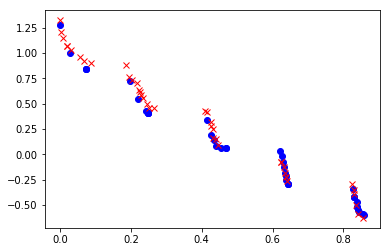

In [43]:
plt.plot(res_1,res_2,'bo')
plt.plot(nsga_x,nsga_y,'rx')
plt.show()